# Summary
Here, we used the top 20 PC of splicing profile to predict the cell type in bladder dataset.


# Content

* get the top 20 PCs
* do prediction

In [2]:
import warnings
warnings.filterwarnings('ignore')

## get the top 20 PCs

In [3]:
import pandas as pd
import scanpy as sc
import numpy as np

In [4]:
adata=sc.read('/storage/yhhuang/users/ruiyan/15organ/scTSS_h5ad/all_transcript/SRR13075718.h5ad')
adata

AnnData object with n_obs × n_vars = 7572 × 1604
    obs: 'cluster', 'tSNE1', 'tSNE2'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len', 'count'
    uns: 'log1p'
    obsm: 'X_tsne'

In [5]:
adata.X[np.nonzero(adata.X)]


array([5.7171273, 6.4086285, 5.7171273, ..., 4.157211 , 4.157211 ,
       4.157211 ], dtype=float32)

In [6]:
sc.tl.pca(adata, svd_solver='arpack')


In [7]:
adata

AnnData object with n_obs × n_vars = 7572 × 1604
    obs: 'cluster', 'tSNE1', 'tSNE2'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len', 'count'
    uns: 'log1p', 'pca'
    obsm: 'X_tsne', 'X_pca'
    varm: 'PCs'

In [8]:
psipcadf=pd.DataFrame(adata.obsm['X_pca'][:,:20])
psipcadf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-11.667304,-0.460122,0.878921,10.190753,-3.712082,0.171885,0.440556,-1.161825,-0.528958,0.658919,-1.310407,-0.798091,-0.128763,-6.313173,1.184856,-2.530757,3.692868,4.745701,-0.055169,-0.176592
1,-9.947920,-4.837116,7.935565,10.475676,-4.349636,-1.093990,-1.139116,-2.472560,-0.878757,-3.113020,0.527954,4.055698,-3.270829,1.210681,1.315783,-0.715142,-0.290833,1.331026,-6.222696,1.226342
2,-9.586779,-2.337018,0.302574,-2.151906,-1.592048,-0.953105,2.853066,2.388015,0.742619,5.919163,-2.772610,3.264281,4.082725,1.419168,-4.856373,4.659238,0.021414,-0.674449,4.873787,-1.885271
3,3.117042,0.564580,-6.904450,4.971679,3.582951,-0.265131,0.704129,-5.048647,-1.378993,1.772789,2.767271,-0.125028,-2.460197,4.127534,-2.679829,1.587075,-4.310091,-3.380618,1.802876,-1.658755
4,-15.242222,-2.495274,-1.514474,-4.249608,-0.979758,2.007106,2.170507,-3.318923,0.259157,0.836922,-3.383881,-1.963999,-2.288125,-0.199626,3.445777,2.525871,0.486831,-0.614690,4.754375,3.763345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567,3.984555,8.171349,-2.061469,-0.024560,-2.202860,0.474008,-4.522456,1.711961,-0.560434,-1.717477,-3.954572,-1.517613,-0.758471,-1.034550,-1.594550,-0.948961,-2.892287,1.062927,-5.275275,1.589665
7568,-8.145703,-1.700107,1.388438,-3.226798,-3.748872,0.822166,0.513994,1.799975,-3.054894,1.358654,-2.163409,4.259122,3.013487,-5.064759,-0.560457,0.272644,-3.939915,4.173608,-3.301335,-2.308357
7569,-5.872601,-5.633789,13.266419,6.588106,-4.917215,1.307114,-0.329816,-2.646023,-2.773687,-0.409921,0.872723,3.487649,2.973393,2.952310,-3.759411,-0.950457,-0.287807,4.023688,0.190908,-3.021638
7570,-11.722953,-0.035807,-6.036618,-6.461637,-0.766786,1.534895,0.805114,1.004234,-1.477370,1.295924,1.898823,-1.523836,0.084756,3.156451,-0.805632,-1.114958,-1.025546,2.634399,-3.452655,-1.719177


In [9]:
celltypedf=pd.DataFrame(adata.obs['cluster'])
celltypedf

,cluster
AAACCTGAGACACTAA-1,Monocyte
AAACCTGAGCATGGCA-1,Macrophage cell
AAACCTGAGCTGAACG-1,NK/T cell
AAACCTGCAAGCTGGA-1,Fibroblast
AAACCTGCATTACCTT-1,NK/T cell
...,...
TTTGTCATCCCAACGG-1,FibSmo Cell
TTTGTCATCCTTGACC-1,NK/T cell
TTTGTCATCGCAAACT-1,Macrophage cell
TTTGTCATCTAACTTC-1,NK/T cell


In [10]:
celltypedf.reset_index(inplace=True)

celltypedf

,index,cluster
0,AAACCTGAGACACTAA-1,Monocyte
1,AAACCTGAGCATGGCA-1,Macrophage cell
2,AAACCTGAGCTGAACG-1,NK/T cell
3,AAACCTGCAAGCTGGA-1,Fibroblast
4,AAACCTGCATTACCTT-1,NK/T cell
...,...,...
7567,TTTGTCATCCCAACGG-1,FibSmo Cell
7568,TTTGTCATCCTTGACC-1,NK/T cell
7569,TTTGTCATCGCAAACT-1,Macrophage cell
7570,TTTGTCATCTAACTTC-1,NK/T cell


In [11]:
allfeaturedf=pd.concat([celltypedf,psipcadf],axis=1)
allfeaturedf

,index,cluster,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,AAACCTGAGACACTAA-1,Monocyte,-11.667304,-0.460122,0.878921,10.190753,-3.712082,0.171885,0.440556,-1.161825,...,-1.310407,-0.798091,-0.128763,-6.313173,1.184856,-2.530757,3.692868,4.745701,-0.055169,-0.176592
1,AAACCTGAGCATGGCA-1,Macrophage cell,-9.947920,-4.837116,7.935565,10.475676,-4.349636,-1.093990,-1.139116,-2.472560,...,0.527954,4.055698,-3.270829,1.210681,1.315783,-0.715142,-0.290833,1.331026,-6.222696,1.226342
2,AAACCTGAGCTGAACG-1,NK/T cell,-9.586779,-2.337018,0.302574,-2.151906,-1.592048,-0.953105,2.853066,2.388015,...,-2.772610,3.264281,4.082725,1.419168,-4.856373,4.659238,0.021414,-0.674449,4.873787,-1.885271
3,AAACCTGCAAGCTGGA-1,Fibroblast,3.117042,0.564580,-6.904450,4.971679,3.582951,-0.265131,0.704129,-5.048647,...,2.767271,-0.125028,-2.460197,4.127534,-2.679829,1.587075,-4.310091,-3.380618,1.802876,-1.658755
4,AAACCTGCATTACCTT-1,NK/T cell,-15.242222,-2.495274,-1.514474,-4.249608,-0.979758,2.007106,2.170507,-3.318923,...,-3.383881,-1.963999,-2.288125,-0.199626,3.445777,2.525871,0.486831,-0.614690,4.754375,3.763345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567,TTTGTCATCCCAACGG-1,FibSmo Cell,3.984555,8.171349,-2.061469,-0.024560,-2.202860,0.474008,-4.522456,1.711961,...,-3.954572,-1.517613,-0.758471,-1.034550,-1.594550,-0.948961,-2.892287,1.062927,-5.275275,1.589665
7568,TTTGTCATCCTTGACC-1,NK/T cell,-8.145703,-1.700107,1.388438,-3.226798,-3.748872,0.822166,0.513994,1.799975,...,-2.163409,4.259122,3.013487,-5.064759,-0.560457,0.272644,-3.939915,4.173608,-3.301335,-2.308357
7569,TTTGTCATCGCAAACT-1,Macrophage cell,-5.872601,-5.633789,13.266419,6.588106,-4.917215,1.307114,-0.329816,-2.646023,...,0.872723,3.487649,2.973393,2.952310,-3.759411,-0.950457,-0.287807,4.023688,0.190908,-3.021638
7570,TTTGTCATCTAACTTC-1,NK/T cell,-11.722953,-0.035807,-6.036618,-6.461637,-0.766786,1.534895,0.805114,1.004234,...,1.898823,-1.523836,0.084756,3.156451,-0.805632,-1.114958,-1.025546,2.634399,-3.452655,-1.719177


In [12]:
allfeaturedf.rename(columns={'Unnamed: 0':'cell_id'},inplace=True)

allfeaturedf

,index,cluster,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,AAACCTGAGACACTAA-1,Monocyte,-11.667304,-0.460122,0.878921,10.190753,-3.712082,0.171885,0.440556,-1.161825,...,-1.310407,-0.798091,-0.128763,-6.313173,1.184856,-2.530757,3.692868,4.745701,-0.055169,-0.176592
1,AAACCTGAGCATGGCA-1,Macrophage cell,-9.947920,-4.837116,7.935565,10.475676,-4.349636,-1.093990,-1.139116,-2.472560,...,0.527954,4.055698,-3.270829,1.210681,1.315783,-0.715142,-0.290833,1.331026,-6.222696,1.226342
2,AAACCTGAGCTGAACG-1,NK/T cell,-9.586779,-2.337018,0.302574,-2.151906,-1.592048,-0.953105,2.853066,2.388015,...,-2.772610,3.264281,4.082725,1.419168,-4.856373,4.659238,0.021414,-0.674449,4.873787,-1.885271
3,AAACCTGCAAGCTGGA-1,Fibroblast,3.117042,0.564580,-6.904450,4.971679,3.582951,-0.265131,0.704129,-5.048647,...,2.767271,-0.125028,-2.460197,4.127534,-2.679829,1.587075,-4.310091,-3.380618,1.802876,-1.658755
4,AAACCTGCATTACCTT-1,NK/T cell,-15.242222,-2.495274,-1.514474,-4.249608,-0.979758,2.007106,2.170507,-3.318923,...,-3.383881,-1.963999,-2.288125,-0.199626,3.445777,2.525871,0.486831,-0.614690,4.754375,3.763345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567,TTTGTCATCCCAACGG-1,FibSmo Cell,3.984555,8.171349,-2.061469,-0.024560,-2.202860,0.474008,-4.522456,1.711961,...,-3.954572,-1.517613,-0.758471,-1.034550,-1.594550,-0.948961,-2.892287,1.062927,-5.275275,1.589665
7568,TTTGTCATCCTTGACC-1,NK/T cell,-8.145703,-1.700107,1.388438,-3.226798,-3.748872,0.822166,0.513994,1.799975,...,-2.163409,4.259122,3.013487,-5.064759,-0.560457,0.272644,-3.939915,4.173608,-3.301335,-2.308357
7569,TTTGTCATCGCAAACT-1,Macrophage cell,-5.872601,-5.633789,13.266419,6.588106,-4.917215,1.307114,-0.329816,-2.646023,...,0.872723,3.487649,2.973393,2.952310,-3.759411,-0.950457,-0.287807,4.023688,0.190908,-3.021638
7570,TTTGTCATCTAACTTC-1,NK/T cell,-11.722953,-0.035807,-6.036618,-6.461637,-0.766786,1.534895,0.805114,1.004234,...,1.898823,-1.523836,0.084756,3.156451,-0.805632,-1.114958,-1.025546,2.634399,-3.452655,-1.719177


In [13]:
namels=['cell_id','cell_type']+['PCA'+str(i) for i in range(1,21)]
namels

['cell_id',
 'cell_type',
 'PCA1',
 'PCA2',
 'PCA3',
 'PCA4',
 'PCA5',
 'PCA6',
 'PCA7',
 'PCA8',
 'PCA9',
 'PCA10',
 'PCA11',
 'PCA12',
 'PCA13',
 'PCA14',
 'PCA15',
 'PCA16',
 'PCA17',
 'PCA18',
 'PCA19',
 'PCA20']

In [14]:
allfeaturedf.columns=namels
allfeaturedf

,cell_id,cell_type,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,...,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20
0,AAACCTGAGACACTAA-1,Monocyte,-11.667304,-0.460122,0.878921,10.190753,-3.712082,0.171885,0.440556,-1.161825,...,-1.310407,-0.798091,-0.128763,-6.313173,1.184856,-2.530757,3.692868,4.745701,-0.055169,-0.176592
1,AAACCTGAGCATGGCA-1,Macrophage cell,-9.947920,-4.837116,7.935565,10.475676,-4.349636,-1.093990,-1.139116,-2.472560,...,0.527954,4.055698,-3.270829,1.210681,1.315783,-0.715142,-0.290833,1.331026,-6.222696,1.226342
2,AAACCTGAGCTGAACG-1,NK/T cell,-9.586779,-2.337018,0.302574,-2.151906,-1.592048,-0.953105,2.853066,2.388015,...,-2.772610,3.264281,4.082725,1.419168,-4.856373,4.659238,0.021414,-0.674449,4.873787,-1.885271
3,AAACCTGCAAGCTGGA-1,Fibroblast,3.117042,0.564580,-6.904450,4.971679,3.582951,-0.265131,0.704129,-5.048647,...,2.767271,-0.125028,-2.460197,4.127534,-2.679829,1.587075,-4.310091,-3.380618,1.802876,-1.658755
4,AAACCTGCATTACCTT-1,NK/T cell,-15.242222,-2.495274,-1.514474,-4.249608,-0.979758,2.007106,2.170507,-3.318923,...,-3.383881,-1.963999,-2.288125,-0.199626,3.445777,2.525871,0.486831,-0.614690,4.754375,3.763345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567,TTTGTCATCCCAACGG-1,FibSmo Cell,3.984555,8.171349,-2.061469,-0.024560,-2.202860,0.474008,-4.522456,1.711961,...,-3.954572,-1.517613,-0.758471,-1.034550,-1.594550,-0.948961,-2.892287,1.062927,-5.275275,1.589665
7568,TTTGTCATCCTTGACC-1,NK/T cell,-8.145703,-1.700107,1.388438,-3.226798,-3.748872,0.822166,0.513994,1.799975,...,-2.163409,4.259122,3.013487,-5.064759,-0.560457,0.272644,-3.939915,4.173608,-3.301335,-2.308357
7569,TTTGTCATCGCAAACT-1,Macrophage cell,-5.872601,-5.633789,13.266419,6.588106,-4.917215,1.307114,-0.329816,-2.646023,...,0.872723,3.487649,2.973393,2.952310,-3.759411,-0.950457,-0.287807,4.023688,0.190908,-3.021638
7570,TTTGTCATCTAACTTC-1,NK/T cell,-11.722953,-0.035807,-6.036618,-6.461637,-0.766786,1.534895,0.805114,1.004234,...,1.898823,-1.523836,0.084756,3.156451,-0.805632,-1.114958,-1.025546,2.634399,-3.452655,-1.719177


In [ ]:
allfeaturedf.to_csv('/storage/yhhuang/users/ruiyan/15organ/SRR13075718/scTSS_PCA_20_for_train.csv')

## do prediction

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from hilearn import ROC_plot, CrossValidation
from sklearn.multiclass import OneVsRestClassifier

In [16]:
alldata=pd.read_csv('/storage/yhhuang/users/ruiyan/15organ/SRR13075718/scTSS_PCA_20_for_train.csv',index_col=0)
alldata

,cell_id,cell_type,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,...,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20
0,AAACCTGAGACACTAA-1,Monocyte,-11.667302,-0.460121,0.878952,10.190753,-3.712077,0.171880,0.440558,-1.161823,...,-1.310396,-0.798110,-0.128752,-6.313188,1.184915,-2.531310,3.692359,4.745742,-0.054945,-0.176796
1,AAACCTGAGCATGGCA-1,Macrophage cell,-9.947917,-4.837114,7.935597,10.475654,-4.349631,-1.094004,-1.139113,-2.472558,...,0.527841,4.055765,-3.270760,1.210689,1.315769,-0.715171,-0.290941,1.330985,-6.222634,1.226182
2,AAACCTGAGCTGAACG-1,NK/T cell,-9.586778,-2.337015,0.302568,-2.151908,-1.592048,-0.953092,2.853076,2.388015,...,-2.772646,3.264135,4.082760,1.419102,-4.856424,4.659284,0.022067,-0.674430,4.873805,-1.885209
3,AAACCTGCAAGCTGGA-1,Fibroblast,3.117041,0.564582,-6.904436,4.971703,3.582950,-0.265125,0.704136,-5.048650,...,2.767259,-0.124945,-2.460226,4.127510,-2.679854,1.587733,-4.309762,-3.380765,1.802898,-1.658673
4,AAACCTGCATTACCTT-1,NK/T cell,-15.242217,-2.495277,-1.514484,-4.249605,-0.979762,2.007115,2.170505,-3.318925,...,-3.383847,-1.964019,-2.288120,-0.199559,3.445818,2.525895,0.487197,-0.614545,4.754131,3.763585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567,TTTGTCATCCCAACGG-1,FibSmo Cell,3.984553,8.171350,-2.061469,-0.024553,-2.202863,0.473993,-4.522460,1.711966,...,-3.954555,-1.517684,-0.758486,-1.034556,-1.594539,-0.948626,-2.892502,1.062854,-5.275282,1.589574
7568,TTTGTCATCCTTGACC-1,NK/T cell,-8.145701,-1.700106,1.388431,-3.226803,-3.748876,0.822165,0.513990,1.799988,...,-2.163492,4.259021,3.013576,-5.064767,-0.560436,0.273108,-3.940010,4.173439,-3.301255,-2.308385
7569,TTTGTCATCGCAAACT-1,Macrophage cell,-5.872600,-5.633787,13.266437,6.588069,-4.917212,1.307102,-0.329822,-2.646019,...,0.872664,3.487603,2.973425,2.952274,-3.759502,-0.950445,-0.288029,4.023615,0.190958,-3.021587
7570,TTTGTCATCTAACTTC-1,NK/T cell,-11.722950,-0.035806,-6.036635,-6.461615,-0.766789,1.534902,0.805106,1.004238,...,1.898850,-1.523803,0.084717,3.156441,-0.805681,-1.114890,-1.025744,2.634281,-3.452513,-1.719329


In [17]:
newcelltypedf=pd.get_dummies(alldata['cell_type'])
newcelltypedf

,B cell,Endothelial Cell,Epithelial Cell,Erythrocyte,FibSmo Cell,Fibroblast,Keratinocyte,Macrophage cell,Melanocyte,Monocyte,NK/T cell,Plasma Cell,Secretory Cell,Smooth Muscle Cell
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7568,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7569,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7570,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
X=alldata.iloc[:,2:22].values
X

array([[-11.667302  ,  -0.46012107,   0.87895155, ...,   4.745742  ,
         -0.05494475,  -0.17679629],
       [ -9.947917  ,  -4.8371143 ,   7.9355974 , ...,   1.3309848 ,
         -6.2226343 ,   1.226182  ],
       [ -9.586778  ,  -2.3370154 ,   0.30256778, ...,  -0.6744299 ,
          4.873805  ,  -1.8852093 ],
       ...,
       [ -5.8725996 ,  -5.633787  ,  13.266437  , ...,   4.023615  ,
          0.19095826,  -3.0215874 ],
       [-11.72295   ,  -0.03580606,  -6.0366354 , ...,   2.6342812 ,
         -3.452513  ,  -1.7193291 ],
       [  6.9867926 ,  -3.8950074 ,  -4.243938  , ...,  -2.376084  ,
         -0.96066546,  -2.975484  ]])

In [19]:
X.shape

(7572, 20)

In [20]:
columnls=list(newcelltypedf.columns)
columnls

['B cell',
 'Endothelial Cell',
 'Epithelial Cell',
 'Erythrocyte',
 'FibSmo Cell',
 'Fibroblast',
 'Keratinocyte',
 'Macrophage cell',
 'Melanocyte',
 'Monocyte',
 'NK/T cell',
 'Plasma Cell',
 'Secretory Cell',
 'Smooth Muscle Cell']

B cell
Endothelial Cell
Epithelial Cell
Erythrocyte
FibSmo Cell
Fibroblast
Keratinocyte
Macrophage cell
Melanocyte
Monocyte
NK/T cell
Plasma Cell
Secretory Cell
Smooth Muscle Cell


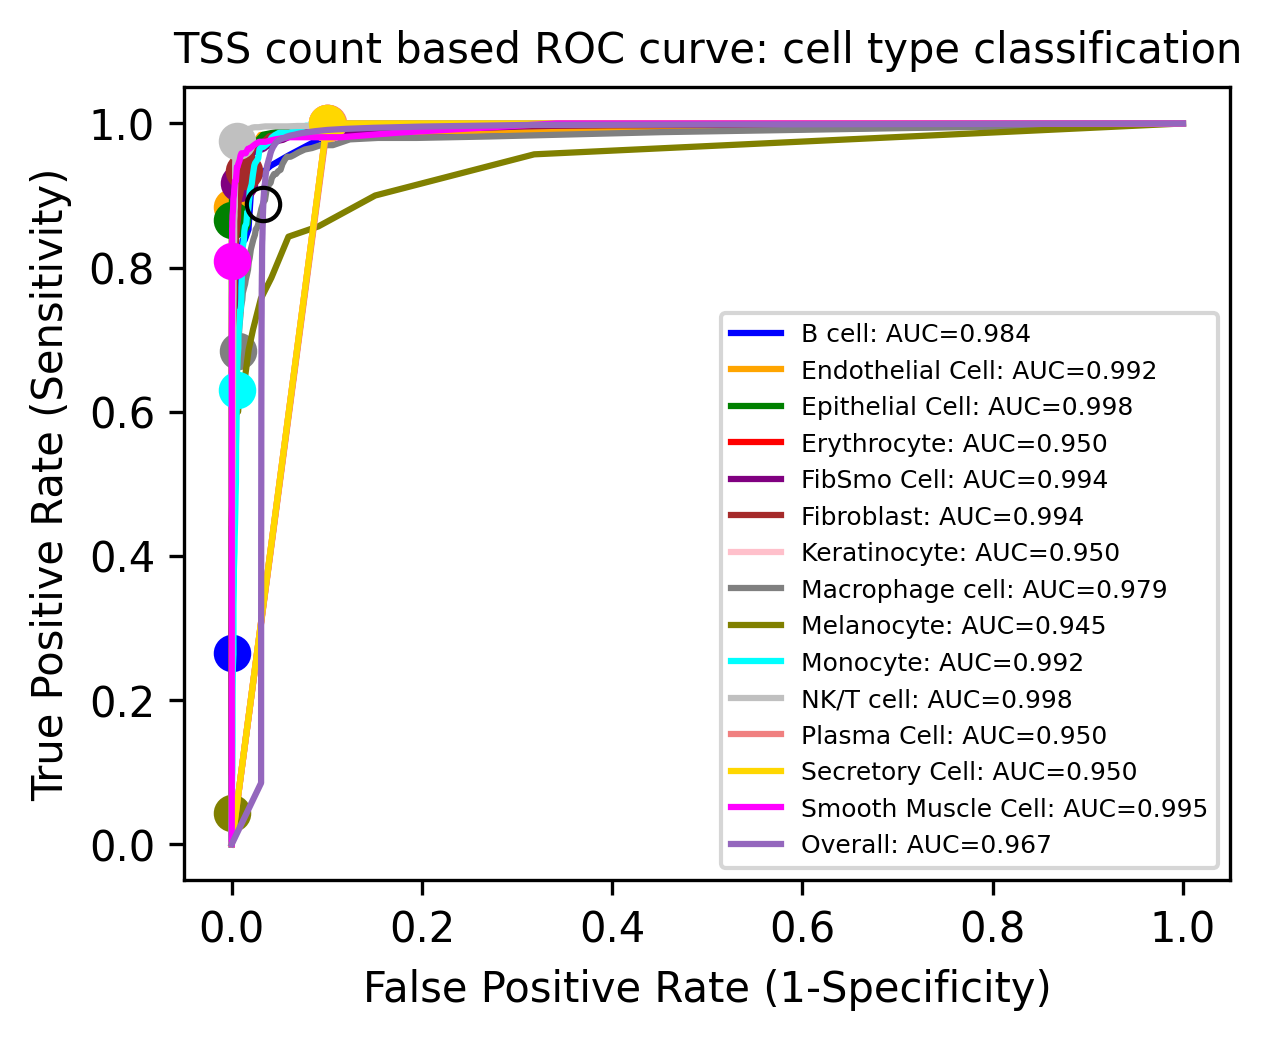

In [23]:
RF_class = RandomForestClassifier(n_estimators=100, n_jobs=-1)
fig = plt.figure(figsize=(4.5, 3.5), dpi=300)
Y_predict={}
Y_scoredict={}
colorls=['blue','orange','green','red','purple','brown','pink','gray','olive','cyan','silver','lightcoral','gold','magenta']
for i,j in zip(columnls,colorls):
    Y=newcelltypedf[i].values
    CV = CrossValidation(X, Y)
    print(i)
    Y_predict[i],Y_scoredict[i] = CV.cv_classification(model=RF_class, folds=10)
    ROC_plot(Y, Y_scoredict[i][:,1], legend_label=i, threshold=0.5, base_line=False,color=j)


scorels=[]
for i in Y_scoredict.values():
    scorels.append(i[:,1])
scorels 
Y_scoredictarray=np.stack(scorels,axis=1)
Y_scoredictarray
ROC_plot(np.array(newcelltypedf).ravel(), Y_scoredictarray.ravel(), legend_label="Overall", threshold=0.5, base_line=False)

plt.title("TSS count based ROC curve: cell type classification",fontsize=10)
plt.legend(loc=4, prop={'size': 6})
#fig.savefig("/storage/yhhuang/users/ruiyan/figure/figure3/scTSS_cv_classification.pdf", dpi=300, bbox_inches='tight')
plt.show()